<a href="https://colab.research.google.com/github/Revanthshalon/Exploratory-Data-Analysis/blob/master/Analysis_of_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries and Files**

In [0]:
'''Importing basic libraries'''
import numpy as np
import pandas as pd

'''Plotting and Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objects as go

%matplotlib inline

**Importing the dataset**

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Corona Analysis/novel-corona-virus-2019-dataset/covid_19_data.csv')

# Checking the dataset

In [3]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**Observation**
- The column 'SNo' is used as an id. We dont need that column for analysis.So that column can be dropped in the next step
- ObservationData and Last Update columns should be converted to datetime format for easier analysis and segregation.

In [0]:
data.drop('SNo',axis=1,inplace=True)# Dropping the column 'SNo'
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])# Converting the ObservationDate column to pd.datetime format
data['Last Update'] = pd.to_datetime(data['Last Update'])# Converting the 'Last Update' column to pd.datetime format

In [5]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


**Observation:**
- The datatype of ObservationData and Last Update columns should be np.datetime
- The Province/State column can be used as a categorical variable and the dtype to be expected is object
- The Country/Region can be used as categorical variable and the datatype to be expected is object
- Confirmed column denote the no. of confirmed cases till the last updated date.
- Deaths column denote the no. of death cases till the last updated date.
- Recovered column denote the no. of recovered cases till the last updated date.

**Next Step**
- Confirm the datatype of each column.
- Check for null values.

In [6]:
data.dtypes # Checking the datatype of each column

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

- From the above results, the expected values and the outcome matches.

In [7]:
data.isnull().any() # Checking if any column has any null values

ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

**Observation:**
- From the above info, it is found that the column 'Province/State' has some missing values.

**Given Info:**
- However it was mentioned in the description that all the data related to the state werent available.
- We can replace the null values with 'Others'

In [8]:
data['Province/State'].fillna('Others',inplace=True)
data.isnull().any()

ObservationDate    False
Province/State     False
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

**Observation:**
- All the null values have been filled. No presence of null values.

# Data Analysis

In [9]:
data['Country/Region'].unique() # Checking the unique values for 'Country/Region' column

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

**Observation:**
- There is no Country with same name or value. 

**Inference:**
- No need to replace any values.

In [10]:
data['Province/State'].unique() # Checking the unique values in column 'Province/State'

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Others', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX', 'None',
    

**Observation:**
- Every city is paired with the country names.
- Diamond Princess Cruise Ship is repeated with the name of 
    'Cruise Ship' ,
    'From Diamond Princess',
    'Omaha, NE (From Diamond Princess)',
    'Travis, CA (From Diamond Princess)',
    'Lackland, TX (From Diamond Princess)',
    'Unassigned Location (From Diamond Princess)'

**Inference:**
- Replace Ship with Diamond Princess Cruise Ship

In [0]:
data['Province/State'].replace('Cruise Ship','Diamond Princess Cruise Ship',inplace=True) # Replacing the'Cruise Ship' with 'Diamond Princess Cruise Ship'
data['Province/State'].replace('Diamond Princess cruise ship','Diamond Princess Cruise Ship',inplace=True) # Replacing the'Diamond Princess cruise ship' with 'Diamond Princess Cruise Ship'
data['Province/State'].replace('From Diamond Princess','Diamond Princess Cruise Ship',inplace=True) # Replacing the'From Diamond Princess' with 'Diamond Princess Cruise Ship'
data['Province/State'].replace('Omaha, NE (From Diamond Princess)','Diamond Princess Cruise Ship',inplace=True) # Replacing the'Omaha, NE (From Diamond Princess)' with 'Diamond Princess Cruise Ship'
data['Province/State'].replace('Travis, CA (From Diamond Princess)','Diamond Princess Cruise Ship',inplace=True) # Replacing the'Travis, CA (From Diamond Princess)' with 'Diamond Princess Cruise Ship'
data['Province/State'].replace('Unassigned Location (From Diamond Princess)','Diamond Princess Cruise Ship',inplace=True) # Replacing the'Unassigned Location (From Diamond Princess)' with 'Diamond Princess Cruise Ship'
data['Province/State'].replace('Lackland, TX (From Diamond Princess)','Diamond Princess Cruise Ship',inplace=True) # Replacing the'Lackland, TX (From Diamond Princess)' with 'Diamond Princess Cruise Ship'

In [12]:
data['Province/State'].unique() # Checking all the unique values

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Others', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Diamond Princess Cruise Ship',
       'San Diego County, CA', 'San Antonio, TX', 'Ashland, NE',
       'Travis, CA', 'Lackland, TX', 'None', 'Humboldt County, CA',
       'Sacramento County, C

**Inference:**
- No Repeating values, Hence none to be changed.

## Seperating the data as per the dates
  **Objectives:**
  
    - For analysis based on the dates
    - To Create a Timeseries plot as well

In [13]:
data['ObservationDate'].unique()

array(['2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-01-29T00:00:00.000000000',
       '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2020-02-13T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-02-18

**Observation:**
- The dates are from January 22 to March 2

**Procedure:**
- Take the last date and try analysis on the final data update.
- Its a cumilative value

In [0]:
latest_data = data[data['ObservationDate']=='2020-03-02T00:00:00.000000000'] # Seperating the latest data from the dataset using boolean masking technique

In [15]:
latest_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2943,2020-03-02,Hubei,Mainland China,2020-03-02 15:03:23,67103.0,2803.0,33934.0
2944,2020-03-02,Others,South Korea,2020-03-02 20:23:16,4335.0,28.0,30.0
2945,2020-03-02,Others,Italy,2020-03-02 20:23:16,2036.0,52.0,149.0
2946,2020-03-02,Others,Iran,2020-03-02 20:23:16,1501.0,66.0,291.0
2947,2020-03-02,Guangdong,Mainland China,2020-03-02 15:03:23,1350.0,7.0,1059.0


In [0]:
# Grouped data by country from latest data
grouped_data = latest_data.groupby('Country/Region')

cm = sns.light_palette('green',as_cmap=True)

# Setting Table th props
th_props = [
            ('font-size','12px'),
            ('font-weight','bold')
]

# Setting Table data props
td_props = [
            ('font-size','11px'),
]

styles = [
          dict(selector = 'th' , props = th_props),
          dict(selector = 'td' , props = td_props)
]

In [17]:
(grouped_data.sum().sort_values('Confirmed',ascending=False).style
 .background_gradient(cmap=cm,subset=['Confirmed','Deaths','Recovered'])
 .highlight_max(color='green',subset=['Confirmed','Deaths','Recovered'])
 .set_table_styles(styles) 
)

,Confirmed,Deaths,Recovered
Country/Region,,,
Mainland China,80026,2912,44810
South Korea,4335,28,30
Italy,2036,52,149
Iran,1501,66,291
Others,705,6,10
Japan,274,6,32
France,191,3,12
Germany,159,0,16
Spain,120,0,2


In [18]:
(grouped_data.get_group('Mainland China')[['Province/State','Confirmed','Deaths','Recovered']].style
#  .background_gradient(cmap = cm,subset=['Confirmed','Deaths','Recovered'])
 .bar(subset=['Confirmed','Deaths','Recovered'])
 .set_table_styles(styles)
)

,Province/State,Confirmed,Deaths,Recovered
2943,Hubei,67103,2803,33934
2947,Guangdong,1350,7,1059
2948,Henan,1272,22,1205
2949,Zhejiang,1206,1,1069
2950,Hunan,1018,4,887
2951,Anhui,990,6,917
2952,Jiangxi,935,1,850
2953,Shandong,758,6,460
2955,Jiangsu,631,0,543
2956,Chongqing,576,6,469


**Plotting China in a Map**

In [0]:
current_data_of_china = grouped_data.get_group('Mainland China')

In [23]:
latest_data.Confirmed.sum()

90309.0

Text(0.5, 1.0, 'Percentage of Confirmed,Deaths to Recovered till 5/3/2020')

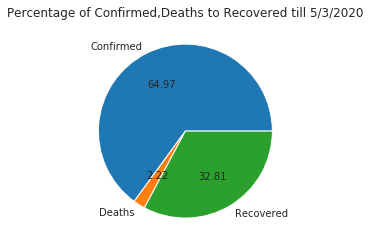

In [28]:
plt.pie([latest_data.Confirmed.sum(),latest_data.Deaths.sum(),latest_data.Recovered.sum()],autopct='%3.2f',labels=['Confirmed','Deaths','Recovered'])
plt.title('Percentage of Confirmed,Deaths to Recovered till 5/3/2020')